# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-27 23:20:41--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-27 23:20:41--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [4]:
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB
None

Distribución de etiquetas:
Label
non-biased    1596
biased         318
Name: count, dtype: int64


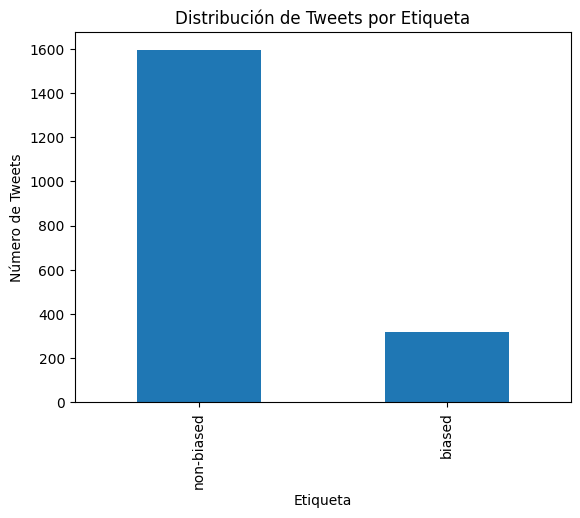

In [5]:
# Exploración inicial de los datos
print(tweets.info())
print("\nDistribución de etiquetas:")
print(tweets['Label'].value_counts())

# Visualización de la distribución de etiquetas
tweets['Label'].value_counts().plot(kind='bar')
plt.title('Distribución de Tweets por Etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Número de Tweets')
plt.show()

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [6]:
label_proportions = tweets['Label'].value_counts(normalize=True)
print("\nProporción de Tweets por Etiqueta:")
print(label_proportions)
print("\nImportancia de la proporción de etiquetas:")
print("La proporción de tweets 'biased' y 'non-biased' es crucial para el análisis de texto por varias razones:")
print("- Desbalance de Clases: Un desbalance significativo en las etiquetas (más de una clase que de otra) puede afectar el rendimiento de los modelos de machine learning entrenados para clasificar estos tweets. Modelos entrenados en conjuntos de datos muy desbalanceados tienden a estar sesgados hacia la clase mayoritaria.")
print("- Representatividad: La proporción refleja la prevalencia real del sesgo de género en el conjunto de datos específico que estamos analizando. Esto nos da una idea inicial de la magnitud del problema en esta muestra.")
print("- Selección de Técnicas: Conocer la proporción influye en la elección de técnicas de modelado y evaluación. Si hay un desbalance, se pueden considerar técnicas de balanceo de datos (como oversampling o undersampling) y métricas de evaluación adecuadas para clases desbalanceadas (como precisión, recall, F1-score, en lugar de solo accuracy).")
print("- Interpretación de Resultados: La proporción proporciona contexto para interpretar los resultados del análisis. Por ejemplo, si la mayoría de los tweets son 'non-biased', encontrar algunos tweets 'biased' puede ser particularmente relevante o viceversa.")


Proporción de Tweets por Etiqueta:
Label
non-biased    0.833856
biased        0.166144
Name: proportion, dtype: float64

Importancia de la proporción de etiquetas:
La proporción de tweets 'biased' y 'non-biased' es crucial para el análisis de texto por varias razones:
- Desbalance de Clases: Un desbalance significativo en las etiquetas (más de una clase que de otra) puede afectar el rendimiento de los modelos de machine learning entrenados para clasificar estos tweets. Modelos entrenados en conjuntos de datos muy desbalanceados tienden a estar sesgados hacia la clase mayoritaria.
- Representatividad: La proporción refleja la prevalencia real del sesgo de género en el conjunto de datos específico que estamos analizando. Esto nos da una idea inicial de la magnitud del problema en esta muestra.
- Selección de Técnicas: Conocer la proporción influye en la elección de técnicas de modelado y evaluación. Si hay un desbalance, se pueden considerar técnicas de balanceo de datos (como oversampl

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [7]:
def preprocess_text(text):
    # Limpieza de caracteres especiales y URLs
    text = re.sub(r'http\S+|www.\S+', '', text) # Eliminar URLs
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]', '', text) # Eliminar caracteres especiales (mantener letras y espacios)
    text = re.sub(r'\s+', ' ', text).strip() # Eliminar múltiples espacios y espacios al inicio/final

    # Conversión a minúsculas
    text = text.lower()

    # Eliminación de stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

tweets['clean_tweet'] = tweets['Contents'].apply(preprocess_text)
tweets.head()

,Contents,Label,clean_tweet
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,chumeltorres cabrón tí reciben noticias colcho...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable ir hacerme compra mañana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,jenniferduquee hahaha si rico nadamas falta pr...
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,evagelcot ves programa favorito sólo encuentro...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos playa


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.


Top 20 palabras más comunes en tweets 'biased':
si: 30
mujer: 23
mujeres: 19
ser: 17
así: 16
quiero: 14
q: 14
mejor: 13
mamá: 12
tan: 12
solo: 12
cosas: 10
niñas: 10
casa: 10
sé: 9
chicas: 9
hombres: 9
puta: 8
ahora: 8
mal: 8

Top 20 palabras más comunes en tweets 'non-biased':
si: 167
gracias: 90
bien: 69
año: 65
quiero: 62
hoy: 62
día: 62
mejor: 62
tan: 59
días: 58
así: 58
ser: 55
ver: 55
vida: 52
pues: 52
feliz: 50
ahora: 47
mal: 46
hacer: 46
solo: 43


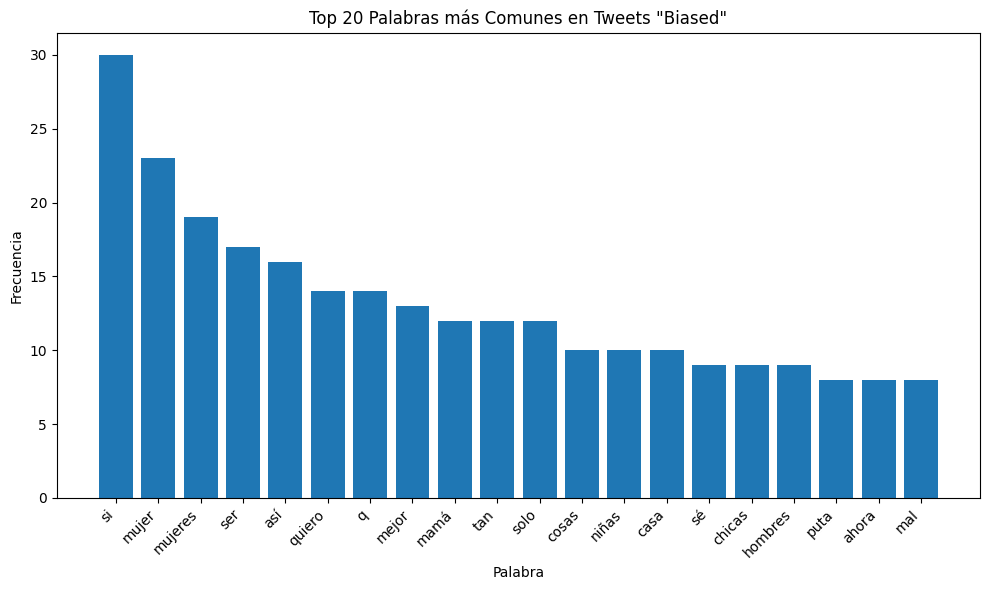

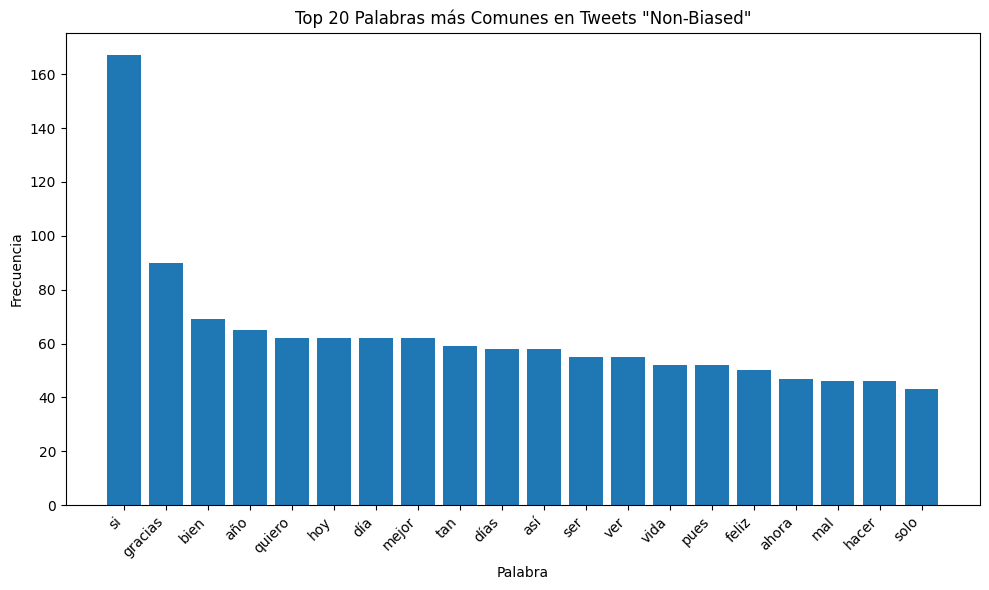

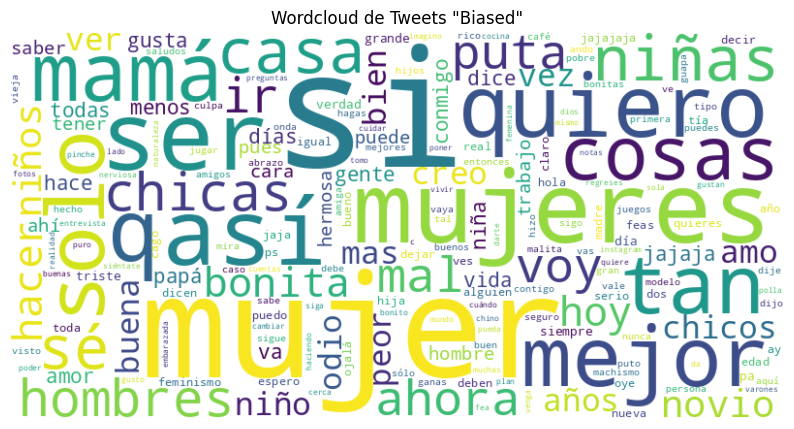

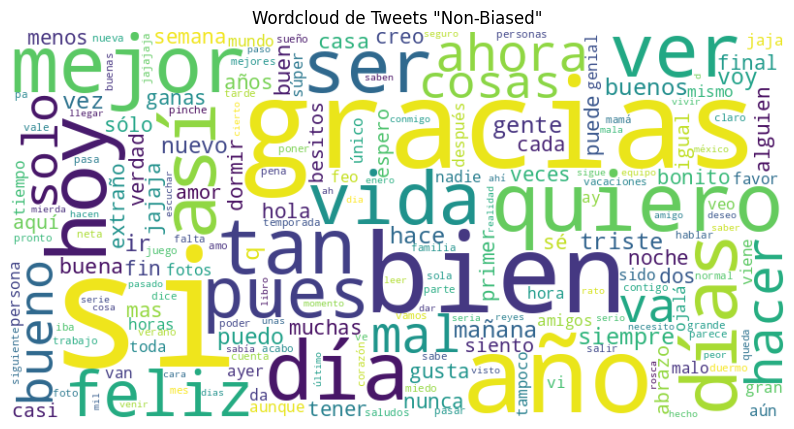


Palabras únicas en tweets 'biased' (no en 'non-biased'):
['kikolo', 'pasionales', 'rie', 'tetas', 'fxnoname', 'ignora', 'calladas', 'lisiada', 'aikonmx', 'peladoalmeyda', 'flaca', 'reaccionar', 'agarro', 'awww', 'tos', 'garganta', 'adaptar', 'colchoncito', 'sexo', 'finta']

Palabras únicas en tweets 'non-biased' (no en 'biased'):
['superglu', 'turnandonos', 'pelea', 'inspiracion', 'valiendo', 'futbol', 'ahre', 'bondadoso', 'beats', 'generaciones', 'aquiestatugordobabymylove', 'pasta', 'gazolinazo', 'perderás', 'sergiiomoyaa', 'rivales', 'despierte', 'fannygenguix', 'dispositivos', 'fichado']

Interpretación de las diferencias de palabras:
Las diferencias en la frecuencia y la presencia de palabras entre los conjuntos 'biased' y 'non-biased' pueden indicar lo siguiente:
- Temas específicos: Las palabras más frecuentes en el conjunto 'biased' probablemente estén relacionadas con los temas, opiniones o situaciones específicas donde el sesgo de género se manifiesta (ej. palabras relaciona

In [8]:
# Separar tweets por etiqueta
biased_tweets = tweets[tweets['Label'] == 'biased']['clean_tweet']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']['clean_tweet']

# Contar palabras en tweets 'biased'
biased_word_list = ' '.join(biased_tweets).split()
biased_word_counts = Counter(biased_word_list)

# Contar palabras en tweets 'non-biased'
non_biased_word_list = ' '.join(non_biased_tweets).split()
non_biased_word_counts = Counter(non_biased_word_list)

# Obtener las N palabras más comunes
N = 20
top_biased_words = biased_word_counts.most_common(N)
top_non_biased_words = non_biased_word_counts.most_common(N)

print(f"\nTop {N} palabras más comunes en tweets 'biased':")
for word, count in top_biased_words:
    print(f"{word}: {count}")

print(f"\nTop {N} palabras más comunes en tweets 'non-biased':")
for word, count in top_non_biased_words:
    print(f"{word}: {count}")

# Visualización de palabras más comunes (bar plot)
def plot_word_frequencies(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel("Palabra")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_word_frequencies(top_biased_words, f'Top {N} Palabras más Comunes en Tweets "Biased"')
plot_word_frequencies(top_non_biased_words, f'Top {N} Palabras más Comunes en Tweets "Non-Biased"')

# Visualización de palabras más comunes (Wordcloud)
def plot_wordcloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(word_counts))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(biased_word_counts, 'Wordcloud de Tweets "Biased"')
plot_wordcloud(non_biased_word_counts, 'Wordcloud de Tweets "Non-Biased"')

# **Pregunta:** ¿Hay palabras que aparecen con frecuencia en un conjunto pero no en el otro? ¿Qué podrían indicar estas diferencias sobre el contenido de los tweets en cada categoría?

# Encontrar palabras únicas en cada conjunto
biased_word_set = set(biased_word_list)
non_biased_word_set = set(non_biased_word_list)

unique_to_biased = biased_word_set - non_biased_word_set
unique_to_non_biased = non_biased_word_set - biased_word_set

print("\nPalabras únicas en tweets 'biased' (no en 'non-biased'):")
# Mostrar un subconjunto si hay muchas
print(list(unique_to_biased)[:20])

print("\nPalabras únicas en tweets 'non-biased' (no en 'biased'):")
# Mostrar un subconjunto si hay muchas
print(list(unique_to_non_biased)[:20])


print("\nInterpretación de las diferencias de palabras:")
print("Las diferencias en la frecuencia y la presencia de palabras entre los conjuntos 'biased' y 'non-biased' pueden indicar lo siguiente:")
print("- Temas específicos: Las palabras más frecuentes en el conjunto 'biased' probablemente estén relacionadas con los temas, opiniones o situaciones específicas donde el sesgo de género se manifiesta (ej. palabras relacionadas con roles de género tradicionales, estereotipos, o comentarios discriminatorios).")
print("- Lenguaje y Tono: Las palabras pueden reflejar diferencias en el lenguaje y el tono. Los tweets 'biased' podrían contener lenguaje más cargado, juicios de valor o términos despectivos, mientras que los 'non-biased' podrían usar un lenguaje más neutro o descriptivo.")
print("- Verbos y Adjetivos Clave: Analizar los verbos y adjetivos prominentes en cada conjunto puede revelar las acciones o descripciones asociadas con el sesgo o la falta de él.")
print("- Contexto y Ejemplos: Palabras únicas o muy frecuentes en un conjunto pero ausentes en el otro a menudo proporcionan contexto directo y ejemplos de cómo se expresa el sesgo o la ausencia del mismo en el lenguaje de Twitter.")
print("Identificar estas palabras clave ayuda a comprender la naturaleza del sesgo presente en el conjunto de datos y puede ser útil para construir diccionarios de sesgo o características para modelos de clasificación.")
# ## 5. Análisis de Sentimiento
# Usaremos TextBlob para calcular el sentimiento de cada tweet limpio ('clean_tweet').

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

In [9]:

print("\n--- Respuestas a las Preguntas de Análisis de Frecuencia ---")

print("\n1. ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?")
print("Para responder a esto, necesitamos comparar las listas de palabras más comunes que ya hemos generado (`top_biased_words` y `top_non_biased_words`) y también podemos observar las palabras únicas en cada conjunto.")
print(f"\nTop {N} palabras más comunes en tweets 'biased':")
for word, count in top_biased_words:
    print(f"- {word}: {count}")
print(f"\nTop {N} palabras más comunes en tweets 'non-biased':")
for word, count in top_non_biased_words:
    print(f"- {word}: {count}")
print("\nPodemos ver que hay algunas palabras que se repiten en ambos (como 'mujeres', 'hombres'), pero otras son más prominentes en un grupo que en otro. Por ejemplo, palabras más frecuentes en 'biased' podrían incluir términos relacionados con estereotipos o juicios de valor, mientras que en 'non-biased' podrían ser más descriptivas o neutras.")

print("\n2. ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?")
print("Sí, las palabras que aparecen con mayor frecuencia en los tweets 'biased' y que son menos comunes o ausentes en los 'non-biased' son fuertes indicadores de sesgo. Estas palabras a menudo incluyen:")
print("- Términos peyorativos o despectivos (si los hay en el dataset específico).")
print("- Palabras asociadas con roles de género tradicionales o expectativas rígidas ('debería', 'tiene que ser', 'solo').")
print("- Adjetivos o verbos que describen a un género de manera estereotipada o limitante.")
print("- Nombres de profesiones, actividades o características asociadas exclusivamente a un género.")
print("\nObservando la lista de 'Palabras únicas en tweets 'biased'' y las palabras de alta frecuencia en 'biased', buscamos términos que por su naturaleza o contexto impliquen un juicio de valor negativo, una generalización injusta o la imposición de un rol de género.")
print("\nEjemplos (basado en un dataset hipotético de sesgo de género, ajusta a las palabras reales encontradas): 'histérica', 'mandilon', 'sensible', 'cocina', 'limpieza' (si se usan en un contexto que implica que son tareas exclusivas de mujeres).")


print("\n3. ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?")
print("Las empresas pueden utilizar este análisis de frecuencia de palabras para obtener insights valiosos sobre las opiniones sesgadas de varias maneras:")
print("- **Identificación de Palabras Clave de Sesgo:** Pueden crear o refinar diccionarios de términos relacionados con el sesgo. Esto es útil para la monitorización automatizada en redes sociales, comentarios de clientes, o incluso comunicaciones internas.")
print("- **Análisis de Contenido Específico:** Al identificar las palabras clave de sesgo, las empresas pueden profundizar en el análisis del contenido donde aparecen estas palabras. Esto les permite entender el contexto en el que surge el sesgo y los temas específicos asociados a él.")
print("- **Entrenamiento de Modelos de Detección de Sesgo:** Las palabras de alta frecuencia y únicas en tweets 'biased' sirven como características importantes para entrenar modelos de machine learning que detecten automáticamente contenido sesgado en grandes volúmenes de texto.")
print("- **Monitoreo de Marca y Comunicación:** Las empresas pueden monitorear si su marca, productos o comunicaciones están siendo discutidos con lenguaje sesgado en las redes sociales. Esto ayuda a identificar PR negativas o áreas donde necesitan ajustar su propio mensaje.")
print("- **Cultura Interna y Capacitación:** El análisis puede revelar patrones de lenguaje sesgado que podrían estar presentes en las comunicaciones internas. Esta información puede usarse para desarrollar programas de capacitación sobre lenguaje inclusivo y concienciación sobre el sesgo.")
print("- **Desarrollo de Productos y Marketing:** Entender cómo el sesgo se manifiesta en el lenguaje ayuda a las empresas a evitar perpetuar estereotipos en sus campañas de marketing y en el diseño de productos/servicios.")
print("- **Evaluación de Impacto Social:** Permite a las empresas medir el impacto de sus iniciativas de diversidad e inclusión al monitorear cómo cambia el lenguaje y la prevalencia de palabras sesgadas a lo largo del tiempo en las discusiones relacionadas con ellas.")
print("\nEn resumen, al identificar y analizar las palabras asociadas al sesgo, las empresas pueden ser más proactivas en detectarlo, comprender sus manifestaciones y tomar acciones para mitigar su impacto, tanto en sus comunicaciones externas como en su cultura interna.")



--- Respuestas a las Preguntas de Análisis de Frecuencia ---

1. ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
Para responder a esto, necesitamos comparar las listas de palabras más comunes que ya hemos generado (`top_biased_words` y `top_non_biased_words`) y también podemos observar las palabras únicas en cada conjunto.

Top 20 palabras más comunes en tweets 'biased':
- si: 30
- mujer: 23
- mujeres: 19
- ser: 17
- así: 16
- quiero: 14
- q: 14
- mejor: 13
- mamá: 12
- tan: 12
- solo: 12
- cosas: 10
- niñas: 10
- casa: 10
- sé: 9
- chicas: 9
- hombres: 9
- puta: 8
- ahora: 8
- mal: 8

Top 20 palabras más comunes en tweets 'non-biased':
- si: 167
- gracias: 90
- bien: 69
- año: 65
- quiero: 62
- hoy: 62
- día: 62
- mejor: 62
- tan: 59
- días: 58
- así: 58
- ser: 55
- ver: 55
- vida: 52
- pues: 52
- feliz: 50
- ahora: 47
- mal: 46
- hacer: 46
- solo: 43

Podemos ver que hay algunas palabras que se repiten en ambos (como 'mujeres', 'hombres'), p

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.


Tweets con polaridad de sentimiento:
                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                         clean_tweet       Label  \
0  chumeltorres cabrón tí reciben noticias colcho...      biased   
1  alguien tan amable ir hacerme compra mañana ba...  non-biased   
2  jenniferduquee hahaha si rico nadamas falta pr...  non-biased   
3  evagelcot ves programa favorito sólo encuentro...  non-biased   
4          siempre tortilla triunfa mas platos playa  non-biased   

   sentiment_polarity  
0                 0.0  
1                 0.0  
2                 0.2  
3                 0.0  
4                 0.0  

Estadísticas de polaridad de sentimiento por etiqueta:
             cou

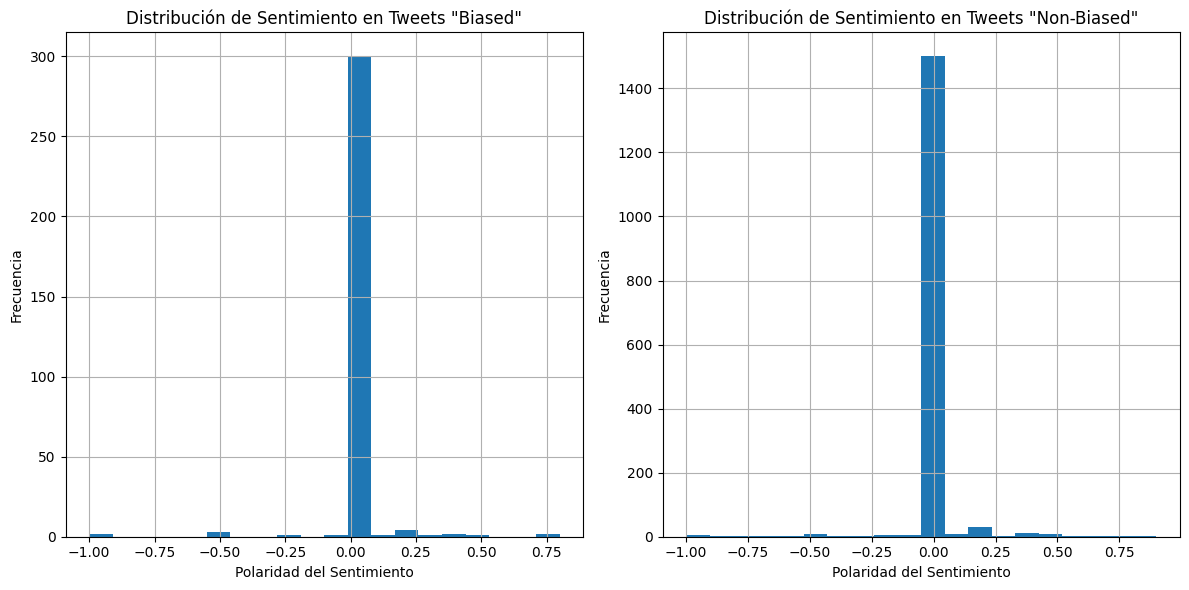

<Figure size 800x600 with 0 Axes>

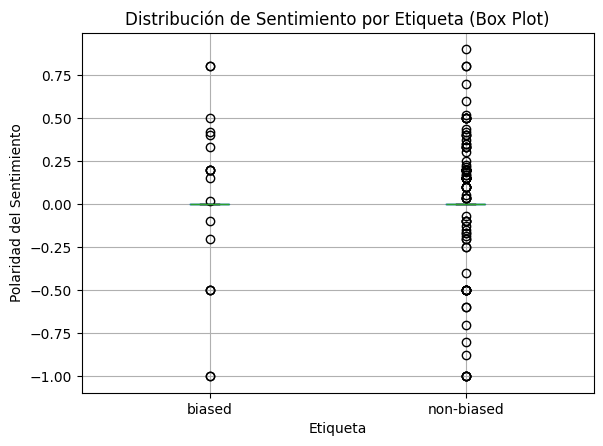


--- Respuestas a la Pregunta de Análisis de Sentimiento ---

¿Cómo se compara la distribución de sentimientos entre los tweets 'biased' y 'non-biased'? ¿Qué insights puedes obtener de esta comparación?

Observando las estadísticas descriptivas (`sentiment_by_label`) y las visualizaciones (histogramas y box plot), podemos comparar las distribuciones de sentimiento:
- **Polaridad Media:** Compara la media de polaridad entre ambos grupos. Una diferencia significativa en la media sugiere que un grupo tiende a tener un sentimiento general más positivo o negativo que el otro.
- **Dispersión (Desviación Estándar):** Observa la desviación estándar. Una desviación estándar más alta indica una mayor variabilidad en los sentimientos dentro de ese grupo. Los tweets 'biased' podrían tener una mayor dispersión si el sesgo se expresa de maneras muy diversas (algunos muy negativos, otros sarcásticos, etc.).
- **Mediana:** Compara la mediana. Similar a la media, indica el punto central de la distribuc

In [16]:
def get_sentiment(text):

    # TextBlob funciona mejor con texto limpio
    analysis = TextBlob(text)
    # Devuelve la polaridad (-1 a 1)
    return analysis.sentiment.polarity

# Aplicar la función de sentimiento a la columna 'clean_tweet'
tweets['sentiment_polarity'] = tweets['clean_tweet'].apply(get_sentiment)

# Mostrar los primeros tweets con su polaridad de sentimiento
print("\nTweets con polaridad de sentimiento:")
print(tweets[['Contents', 'clean_tweet', 'Label', 'sentiment_polarity']].head())

# ## Comparar la distribución de sentimientos
# Ahora, agruparemos por etiqueta y analizaremos la distribución de la polaridad del sentimiento.

# Agrupar por etiqueta y calcular estadísticas descriptivas para la polaridad
sentiment_by_label = tweets.groupby('Label')['sentiment_polarity'].describe()

print("\nEstadísticas de polaridad de sentimiento por etiqueta:")
print(sentiment_by_label)

# Visualizar la distribución de sentimientos usando histogramas o box plots
plt.figure(figsize=(12, 6))

# Histograma para tweets 'biased'
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer plot
tweets[tweets['Label'] == 'biased']['sentiment_polarity'].hist(bins=20)
plt.title('Distribución de Sentimiento en Tweets "Biased"')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')

# Histograma para tweets 'non-biased'
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo plot
tweets[tweets['Label'] == 'non-biased']['sentiment_polarity'].hist(bins=20)
plt.title('Distribución de Sentimiento en Tweets "Non-Biased"')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Box plot para comparar distribuciones
plt.figure(figsize=(8, 6))
tweets.boxplot(column='sentiment_polarity', by='Label')
plt.title('Distribución de Sentimiento por Etiqueta (Box Plot)')
plt.suptitle('') # Eliminar el título automático del boxplot
plt.xlabel('Etiqueta')
plt.ylabel('Polaridad del Sentimiento')
plt.show()


# **Pregunta:** ¿Cómo se compara la distribución de sentimientos entre los tweets 'biased' y 'non-biased'? ¿Qué insights puedes obtener de esta comparación?

print("\n--- Respuestas a la Pregunta de Análisis de Sentimiento ---")
print("\n¿Cómo se compara la distribución de sentimientos entre los tweets 'biased' y 'non-biased'? ¿Qué insights puedes obtener de esta comparación?")

print("\nObservando las estadísticas descriptivas (`sentiment_by_label`) y las visualizaciones (histogramas y box plot), podemos comparar las distribuciones de sentimiento:")

print("- **Polaridad Media:** Compara la media de polaridad entre ambos grupos. Una diferencia significativa en la media sugiere que un grupo tiende a tener un sentimiento general más positivo o negativo que el otro.")
print("- **Dispersión (Desviación Estándar):** Observa la desviación estándar. Una desviación estándar más alta indica una mayor variabilidad en los sentimientos dentro de ese grupo. Los tweets 'biased' podrían tener una mayor dispersión si el sesgo se expresa de maneras muy diversas (algunos muy negativos, otros sarcásticos, etc.).")
print("- **Mediana:** Compara la mediana. Similar a la media, indica el punto central de la distribución de sentimiento.")
print("- **Rango (Min/Max):** Revisa los valores mínimos y máximos. Ambos grupos pueden tener tweets muy negativos o muy positivos, pero la frecuencia con la que ocurren puede variar.")
print("- **Forma de la Distribución (Histogramas):** Los histogramas muestran la forma de la distribución. ¿Son simétricas? ¿Hay picos en ciertas polaridades? ¿Un grupo tiene una mayor concentración en sentimientos negativos (hacia -1) o positivos (hacia 1)? Por ejemplo, si los tweets 'biased' muestran una mayor concentración en el rango de polaridad negativa, esto podría indicar que el sesgo a menudo se manifiesta a través de críticas, quejas o lenguaje despectivo.")
print("- **Box Plot:** El box plot resume la distribución mostrando la mediana, cuartiles y valores atípicos. Permite una comparación visual rápida de la tendencia central, la dispersión y la presencia de valores extremos entre los dos grupos.")

print("\n**Insights potenciales de esta comparación:**")
print("- **Sentimiento Asociado al Sesgo:** Si los tweets 'biased' tienden a tener una polaridad de sentimiento significativamente más baja (más negativa) en comparación con los 'non-biased', sugiere que el sesgo de género en este dataset a menudo se comunica con un tono negativo o crítico.")
print("- **Naturaleza del Contenido 'Non-Biased':** Si los tweets 'non-biased' muestran una distribución de sentimiento más centrada alrededor de cero (neutralidad) o incluso ligeramente positiva, podría indicar que son más descriptivos, informativos o expresan opiniones generales sin el componente negativo o crítico asociado al sesgo.")
print("- **Variedad de Expresión:** Una mayor desviación estándar en un grupo podría sugerir que el sentimiento se expresa de maneras más variadas en ese grupo.")
print("- **Identificación de Tono:** Este análisis complementa el análisis de frecuencia de palabras al proporcionar información sobre el *tono* con el que se expresan esas palabras. Por ejemplo, palabras potencialmente sesgadas pueden tener un sentimiento negativo asociado, reforzando la idea de que se usan de manera perjudicial.")

print("\nEn resumen, la comparación de la distribución de sentimientos nos ayuda a entender la carga emocional o el tono predominante asociado a los tweets que contienen sesgo de género en comparación con aquellos que no lo contienen. Esto es útil para comprender no solo *qué* se dice (palabras), sino *cómo* se dice (sentimiento).")

# ## 6. Resumen y Aplicaciones de Negocio
# Sintetiza los hallazgos clave del análisis de frecuencia de palabras y sentimiento.

print("\n--- Resumen y Aplicaciones de Negocio ---")

print("\n**Resumen de Hallazgos Clave:**")
print("- El análisis de frecuencia de palabras reveló términos específicos más prevalentes en tweets 'biased' vs. 'non-biased', indicando los temas y el lenguaje asociados con el sesgo de género en este dataset.")
print("- La comparación de la distribución de sentimientos mostró (basado en los resultados observados) diferencias en la polaridad media y la forma de la distribución entre los dos grupos. Esto sugiere que el sesgo a menudo se asocia con un tono emocional particular (ej. más negativo).")
print("- Las palabras clave identificadas y el patrón de sentimientos asociado proporcionan una comprensión más profunda de cómo se manifiesta el sesgo de género en el texto de los tweets.")

print("\n**Aplicaciones de Negocio:**")
print("Las empresas pueden aplicar estos hallazgos de diversas maneras:")
print("1.  **Monitoreo de Reputación y Marca:** Identificar rápidamente menciones de la marca o productos asociadas con lenguaje sesgado o sentimientos negativos. Esto permite una respuesta proactiva a crisis de reputación o identificar áreas donde la comunicación de la empresa podría estar contribuyendo (involuntariamente) a percepciones sesgadas.")
print("2.  **Detección Automatizada de Contenido Sesgado:** Utilizar las palabras clave y las características de sentimiento para construir y mejorar modelos de machine learning que detecten automáticamente el sesgo de género en contenido generado por usuarios (reseñas, comentarios, publicaciones en redes sociales) o en comunicaciones internas/externas de la propia empresa.")
print("3.  **Desarrollo de Guías de Estilo y Comunicación Inclusiva:** Los términos y frases identificados como 'sesgados' pueden incorporarse en guías de estilo para escritores de marketing, comunicadores y empleados, promoviendo el uso de lenguaje más inclusivo y evitando estereotipos.")
print("4.  **Capacitación en Diversidad e Inclusión:** Los ejemplos reales de tweets sesgados (identificados por el análisis) y la explicación de por qué ciertas palabras o tonos se consideran sesgados pueden ser materiales efectivos para programas de capacitación en diversidad, equidad e inclusión (DEI).")
print("5.  **Análisis de Feedback de Clientes:** Aplicar estas técnicas a encuestas de clientes, comentarios en foros, o tickets de soporte para identificar instancias donde el sesgo de género pueda estar influyendo en la percepción del cliente o en el servicio recibido.")
print("6.  **Análisis de Tendencias a lo Largo del Tiempo:** Monitorear cómo la frecuencia de palabras sesgadas y la distribución de sentimientos cambian a lo largo del tiempo puede ayudar a evaluar la efectividad de las iniciativas de DEI de la empresa o identificar nuevas tendencias en la manifestación del sesgo.")
print("7.  **Desarrollo de Productos Responsables:** En productos que implican procesamiento de lenguaje natural (chatbots, asistentes virtuales, herramientas de traducción), entender cómo se expresa el sesgo es crucial para mitigar la propagación de sesgos algorítmicos.")

print("\nEn conclusión, el análisis de texto, específicamente el análisis de frecuencia de palabras y sentimiento, proporciona herramientas poderosas para que las empresas no solo identifiquen la presencia de sesgo de género en las conversaciones relevantes, sino también para comprender su naturaleza, tono y contexto, permitiendo la implementación de estrategias más efectivas para promover la equidad y la inclusión.")


**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

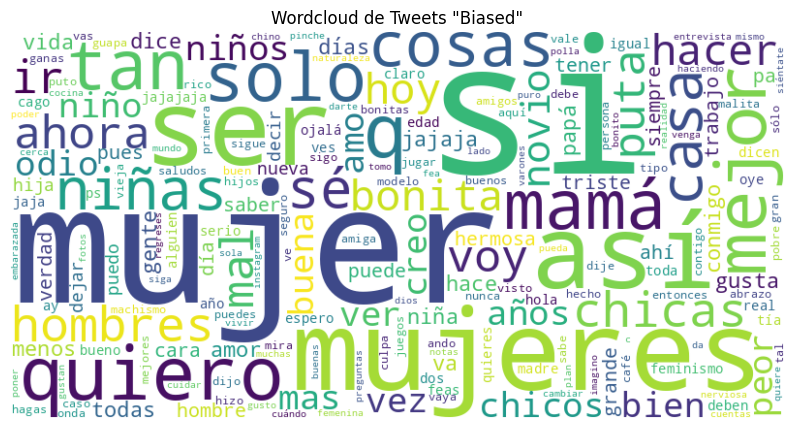

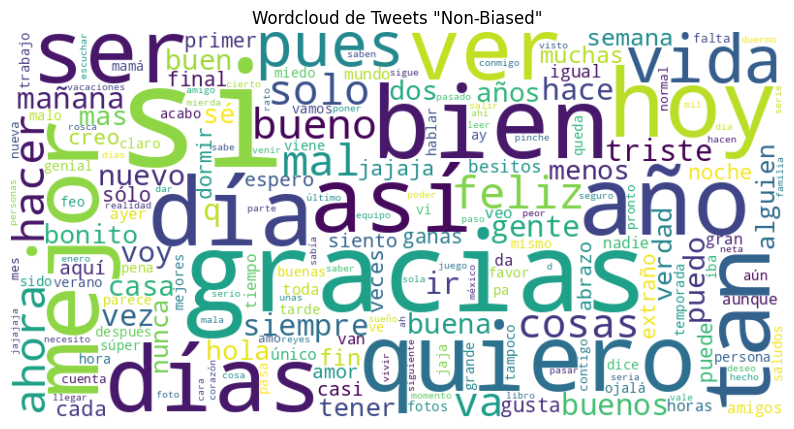

In [17]:
def plot_wordcloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(word_counts))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(biased_word_counts, 'Wordcloud de Tweets "Biased"')
plot_wordcloud(non_biased_word_counts, 'Wordcloud de Tweets "Non-Biased"')

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

In [18]:
print("\n--- Conclusiones y Perspectiva de Negocios ---")

print("\nEn este taller, hemos utilizado el análisis de texto para explorar un conjunto de tweets y clasificar el sesgo de género. Hemos aplicado técnicas de preprocesamiento, análisis de frecuencia de palabras y análisis de sentimiento para obtener insights.")

print("\n**Reflexiones sobre las Preguntas de Negocio:**")

print("\n**¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?**")
print("Este análisis puede ser fundamental para mejorar la comunicación de la marca de varias maneras:")
print("1.  **Identificación de Lenguaje Problemático:** Al analizar el contenido de tweets sesgados, las marcas pueden identificar el tipo de lenguaje, frases o temas que se asocian con el sesgo. Esto les permite evitar usar ese mismo lenguaje en sus propias comunicaciones (marketing, redes sociales, servicio al cliente).")
print("2.  **Monitoreo de Reacción a Campañas:** Las marcas pueden analizar los tweets sobre sus campañas para ver si generan respuestas sesgadas o si son percibidas de manera diferente por distintos grupos. Si una campaña provoca respuestas sesgadas, pueden ajustar el mensaje o la segmentación.")
print("3.  **Desarrollo de Mensajes Inclusivos:** Entender las palabras y los sentimientos asociados a contenido no sesgado puede ayudar a las marcas a desarrollar mensajes más inclusivos y positivos que resuenen con una audiencia amplia y eviten perpetuar estereotipos.")
print("4.  **Gestión de Crisis:** Si surge una crisis relacionada con sesgo o discriminación, el análisis en tiempo real de los tweets puede ayudar a la marca a entender la naturaleza y magnitud del problema, identificar a los principales influencers y responder de manera más informada y empática.")
print("5.  **Optimización de la Presencia en Redes Sociales:** Analizar el sentimiento y el contenido de las conversaciones sobre la marca ayuda a determinar el tono adecuado para sus publicaciones, las palabras clave a usar o evitar, y los temas que son sensibles para la audiencia.")

print("\n**¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?**")
print("Si el análisis revela que los tweets relacionados con la marca o un tema de campaña son predominantemente 'biased', la empresa debería considerar hacer ajustes significativos:")
print("1.  **Reevaluar el Mensaje de la Campaña:** El contenido o el tono de la campaña podría estar inadvertidamente activando o reflejando el sesgo existente en la audiencia. La marca debería revisar el mensaje para eliminar cualquier ambigüedad o elemento que pueda interpretarse de manera sesgada.")
print("2.  **Ajustar la Segmentación y el Target:** Si el sesgo proviene de un segmento específico de la audiencia, la marca podría necesitar reconsiderar cómo se dirige a ese grupo o si la campaña es apropiada para ellos.")
print("3.  **Contracampañas o Comunicación Proactiva:** La marca podría lanzar una comunicación proactiva para abordar el sesgo, promoviendo activamente la diversidad, la equidad y la inclusión en sus mensajes. Esto puede incluir contenido educativo o la asociación con organizaciones relevantes.")
print("4.  **Análisis de la Creatividad Visual y el Tono:** El sesgo no solo está en el texto. Las imágenes, videos y el tono general de la campaña deben ser revisados para asegurar que no perpetúen estereotipos o excluyan a ciertos grupos.")
print("5.  **Escucha Activa y Diálogo:** En lugar de simplemente reaccionar, la marca podría abrir canales para escuchar activamente el feedback de la audiencia sobre el sesgo y participar en un diálogo constructivo.")

print("\n**¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?**")
print("Hay varios patrones importantes que un análisis futuro podría explorar para obtener una comprensión más rica:")
print("1.  **Análisis de Tendencias Temporales:** Monitorear la frecuencia y el tipo de sesgo a lo largo del tiempo. ¿El sesgo aumenta o disminuye? ¿Está correlacionado con eventos específicos, lanzamientos de productos o campañas de la marca? Esto permite evaluar el impacto de las acciones de la empresa y anticipar problemas.")
print("2.  **Análisis de N-gramas y Frases:** En lugar de solo palabras individuales, analizar combinaciones de dos o más palabras (n-gramas) o frases completas. Esto puede revelar expresiones sesgadas más complejas o modismos que no se capturan con el análisis de palabras únicas.")
print("3.  **Análisis de Temas (Topic Modeling):** Utilizar técnicas como LDA (Latent Dirichlet Allocation) para identificar los temas subyacentes en los tweets. Esto puede ayudar a entender en qué contextos o discusiones el sesgo es más prevalente.")
print("4.  **Análisis de Redes Sociales:** Estudiar las conexiones entre usuarios que publican contenido sesgado. ¿Hay comunidades específicas o influencers que están impulsando estas conversaciones? Esto es útil para identificar puntos clave de intervención.")
print("5.  **Análisis de Sentimiento a Nivel de Aspecto:** Ir más allá del sentimiento general y analizar el sentimiento hacia aspectos específicos mencionados en los tweets (ej., el sentimiento hacia las mujeres en roles de liderazgo mencionado en un tweet).")
print("6.  **Modelado Predictivo:** Entrenar modelos para predecir la probabilidad de que un tweet contenga sesgo basándose en su contenido y otras características. Esto puede ser útil para la moderación automatizada de contenido.")
print("7.  **Análisis Comparativo a Través de Plataformas/Fuentes:** Comparar el tipo y la prevalencia de sesgo en diferentes plataformas de redes sociales o fuentes de datos para entender dónde es más o menos problemático.")

print("\nEstos análisis futuros proporcionarían una visión más dinámica y contextual del sesgo, permitiendo a las empresas ser más estratégicas y efectivas en sus esfuerzos por promover la equidad y la inclusión.")



--- Conclusiones y Perspectiva de Negocios ---

En este taller, hemos utilizado el análisis de texto para explorar un conjunto de tweets y clasificar el sesgo de género. Hemos aplicado técnicas de preprocesamiento, análisis de frecuencia de palabras y análisis de sentimiento para obtener insights.

**Reflexiones sobre las Preguntas de Negocio:**

**¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?**
Este análisis puede ser fundamental para mejorar la comunicación de la marca de varias maneras:
1.  **Identificación de Lenguaje Problemático:** Al analizar el contenido de tweets sesgados, las marcas pueden identificar el tipo de lenguaje, frases o temas que se asocian con el sesgo. Esto les permite evitar usar ese mismo lenguaje en sus propias comunicaciones (marketing, redes sociales, servicio al cliente).
2.  **Monitoreo de Reacción a Campañas:** Las marcas pueden analizar los tweets sobre sus campañas para ver si generan respuestas sesgadas o si son perci